<a href="https://colab.research.google.com/github/OnkarMate06/Inueron-project/blob/main/billionaires_22_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploratory data analysis  


# we have gather data from kaggel to do EDA on data 
1. this data is Forbes billionaires in 2022
2. lets see dive into  2022 billionaire dataset what age they are,what they do, which industry they belong, whats their networth and other factors  


In [ ]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# import data set in pandas data frame to do analysis 
df = pd.read_csv('/content/2022_forbes_billionaires.csv')
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


# data manging  
1. try to understand what data represent 
2. how much numerical and catagorical value we got 
3. do we need to normalize numerical data for model development or not?
4. check if any missing value is present 
5. correct wrong format if present
6. if missing value is present then should we remove it 
7. if we should remove it then Why?
8. if we should not remove then replace it? why? and replcae it with  what 
9. how may catagorical value we got 
10. is there any oultier present 
11. is present then treat outlier for model development 

In [ ]:
# 1.what data represent 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [ ]:
df.shape
# here we got 8 columns and 2600 rows 

(2600, 8)

In [ ]:
df.columns


Index(['Unnamed: 0', 'rank', 'name', 'networth', 'age', 'country', 'source',
       'industry'],
      dtype='object')

In [ ]:
# here we observe that we got unused column which is unnamed which represent indexing numbers so we remove it 
df = df.drop(columns ='Unnamed: 0',axis= 1)
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [ ]:
# 2. count numerical and catagorical values 
df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [ ]:
# here we observe that country, source, industries are potential attribute for catagorical values to check this 
b = df['industry'].value_counts()
b.size

18

In [ ]:
a=df['source'].value_counts()
a.size

895

In [ ]:
c = df['country'].value_counts()
c.size

75

In [ ]:
# here we notice that there is only one catagorical value which is industry and 
# rank, age are numerical values 
# other remaining are string values 

In [ ]:
# 4.checking for null values 
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [ ]:
# 5. no null value is present so no need to remove it 
# 6. no need 
# 7. no need
# 8. we got catagorical value

In [ ]:
# now we check if age has any range or not
df.age.describe()
# here we can see that min age is 13.22 and max age is 100 years 

count    2600.000000
mean       64.271923
std        13.220607
min        19.000000
25%        55.000000
50%        64.000000
75%        74.000000
max       100.000000
Name: age, dtype: float64

In [ ]:
# Now we check duplicate values
df.duplicated().value_counts()

False    2600
dtype: int64

In [ ]:
# so all values are unique no need to remove dupicate 


In [ ]:
# 9. we need netowth in float format
df.networth = df.networth.str.replace('$','')
df.networth = df.networth.str.replace(' B','')
df.networth = df.networth.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


# data analysis 
1. which top 20 country has high number of people are billionaire

In [ ]:
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
df.describe()

,rank,networth,age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


In [ ]:
# here we set rank as index for eaiser understanding and store into new variable 
new_df = df.set_index('rank')
new_df

,name,networth,age,country,source,industry
rank,,,,,,
1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
2,Jeff Bezos,171.0,58,United States,Amazon,Technology
3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
4,Bill Gates,129.0,66,United States,Microsoft,Technology
5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail


In [ ]:
# In above cell we can see some bollionaire has same rank, but we do not drop this duplicate rank cause we need to see all billionire data
country = df['country'].unique()
print(country.size, country)

75 ['United States' 'France' 'India' 'Mexico' 'China' 'Canada' 'Spain'
 'Germany' 'Hong Kong' 'Italy' 'Australia' 'Austria' 'Japan' 'Indonesia'
 'Switzerland' 'Chile' 'Russia' 'Singapore' 'Sweden' 'Czechia'
 'United Kingdom' 'Brazil' 'Israel' 'Netherlands' 'Ireland' 'Nigeria'
 'Denmark' 'Thailand' 'Cyprus' 'Malaysia' 'Taiwan' 'Monaco' 'Colombia'
 'New Zealand' 'South Korea' 'Belgium' 'South Africa' 'Philippines'
 'Egypt' 'Greece' 'Norway' 'Vietnam' 'Poland' 'Eswatini (Swaziland)'
 'Peru' 'Algeria' 'Kazakhstan' 'Georgia' 'Portugal' 'Turkey' 'Finland'
 'Ukraine' 'Argentina' 'Belize' 'Venezuela' 'Lebanon' 'Zimbabwe' 'Romania'
 'United Arab Emirates' 'Oman' 'Iceland' 'Guernsey' 'Liechtenstein'
 'Qatar' 'Morocco' 'Bulgaria' 'Macau' 'Slovakia' 'Barbados' 'Uruguay'
 'Nepal' 'Tanzania' 'St. Kitts and Nevis' 'Hungary' 'Estonia']


In [ ]:
countbycountry = df.country.value_counts()
countbycountry[:20]

United States     719
China             515
India             161
Germany           130
Russia             81
Hong Kong          67
Canada             64
Brazil             60
Italy              52
Taiwan             51
United Kingdom     49
Sweden             45
Australia          44
France             43
Switzerland        41
South Korea        41
Japan              36
Indonesia          30
Israel             29
Thailand           28
Name: country, dtype: int64

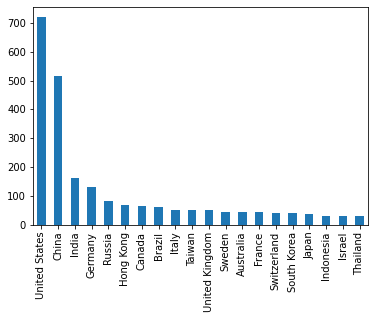

In [ ]:
# here we got top 20 country where high number of people are billionaire
countbycountry[:20].plot(kind = 'bar')

In [ ]:
# here we see which is source have more billionaire
source = df.source.value_counts()
source[0:20]

real estate        148
investments         93
pharmaceuticals     91
diversified         83
software            57
hedge funds         42
private equity      37
retail              35
chemicals           31
manufacturing       29
banking             27
consumer goods      26
electronics         21
mining              21
telecom             20
auto parts          20
fintech             20
finance             19
semiconductors      18
online games        17
Name: source, dtype: int64

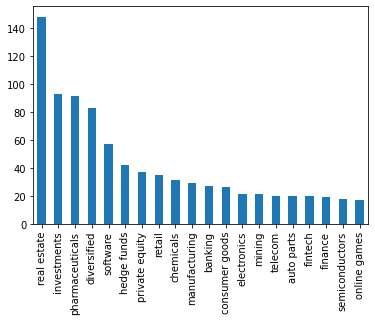

In [ ]:
# here we observe that real estate is source of most billionaire
source[:20].plot(kind ='bar')

In [ ]:
# which industries have more billionaire
industries = df.industry.value_counts()
industries

Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: industry, dtype: int64

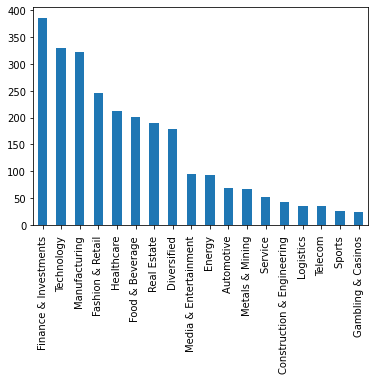

In [ ]:
# here we see that finance & investment industry has more billionaier
industries.plot(kind = 'bar')

##1 here we see count of billionaire according to their networth

In [ ]:
df.networth.describe()

count    2600.000000
mean        4.860750
std        10.659671
min         1.000000
25%         1.500000
50%         2.400000
75%         4.500000
max       219.000000
Name: networth, dtype: float64

In [ ]:
networth = df.networth.value_counts()
networth

1.5      147
1.3      134
1.1      130
1.2      124
1.4      114
        ... 
17.9       1
17.8       1
17.4       1
17.3       1
219.0      1
Name: networth, Length: 228, dtype: int64

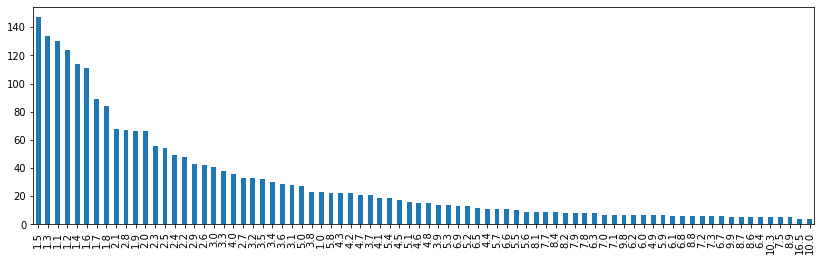

In [ ]:
# here we see that most of billionaire have 1.5 billion as their networth 
networth[:10].plot(kind ='bar', figsize =(14,4))

***Findings - most of billionaire have 1.5B as their networth***



## 2 lets check pepole who have networth 1.5B belongs to which industry

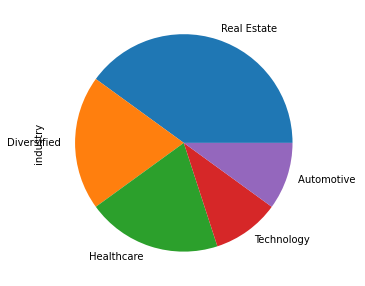

In [ ]:
# lets check pepole who have networth 1.5 belongs to which industry
which =df.get(df['networth']==1.5)
w = which['industry'][:10].value_counts()
w.plot(kind ='pie',figsize=(7,5))

here we see that billionaire who has 1.5 B as their networth most of them belong to Real Estate

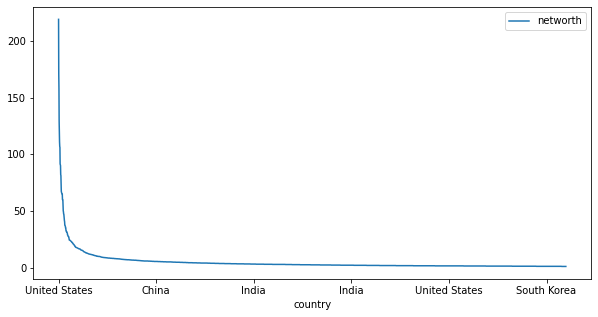

In [ ]:
# here we see that united state has more billionaire than other country
df.plot(x='country',y ='networth', figsize=(10,5))

(array([  8.,  32., 118., 252., 561., 602., 479., 345., 154.,  49.]),
 array([ 19. ,  27.1,  35.2,  43.3,  51.4,  59.5,  67.6,  75.7,  83.8,
         91.9, 100. ]),
 <a list of 10 Patch objects>)

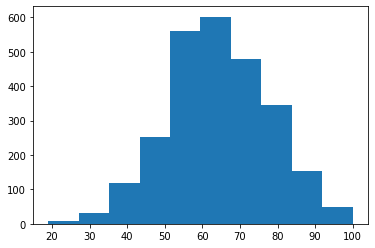

In [ ]:
# now we look at age
plt.hist(df['age'])

In [ ]:
df.age.describe()

count    2600.000000
mean       64.271923
std        13.220607
min        19.000000
25%        55.000000
50%        64.000000
75%        74.000000
max       100.000000
Name: age, dtype: float64

 ***Finding - As we can see age between 60-70 has more number of billionaire***

 
lets see Indaian billionaire


In [ ]:
#now we serach in india who and how many billionaire are present with their rank 
india = df.get(df['country']=='India')
india.groupby(india['rank'])
india.head(10)

,rank,name,networth,age,country,source,industry
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified
10,11,Gautam Adani & family,90.0,59,India,"infrastructure, commodities",Diversified
46,47,Shiv Nadar,28.7,76,India,software services,Technology
56,56,Cyrus Poonawalla,24.3,80,India,vaccines,Healthcare
80,81,Radhakishan Damani,20.0,67,India,"retail, investments",Fashion & Retail
88,89,Lakshmi Mittal,17.9,71,India,steel,Metals & Mining
91,91,Savitri Jindal & family,17.7,72,India,steel,Metals & Mining
105,106,Kumar Birla,16.5,54,India,commodities,Diversified
114,115,Dilip Shanghvi,15.6,66,India,pharmaceuticals,Healthcare
128,129,Uday Kotak,14.3,63,India,banking,Finance & Investments


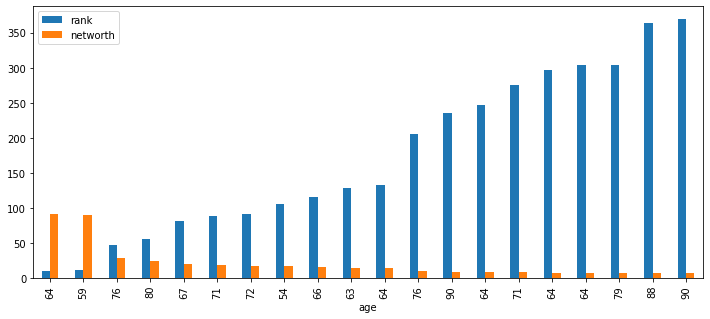

In [ ]:
# here we see top 20 billionaire Networth in india and their age
india[:20].plot(kind='bar',x='age',figsize = (12,5))

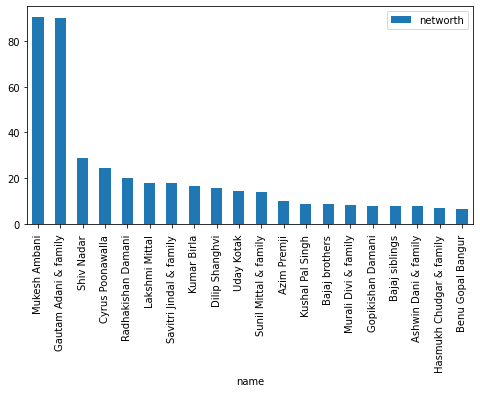

In [ ]:
india[:20].plot(kind='bar',x='name',y='networth',figsize =(8,4))

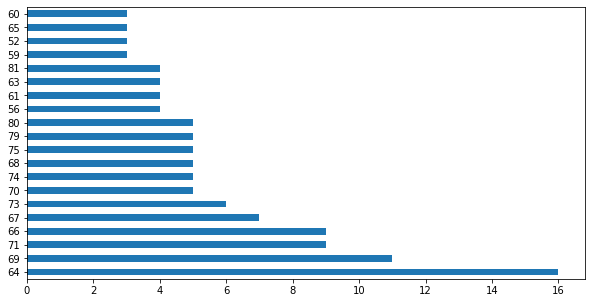

In [ ]:
#in india what is age of billionaire with thier count 
age = india['age'].value_counts()
age[:20].plot(kind='barh',figsize=(10,5))

In [ ]:
print('India country billionaire age and count are {}'.format(age))

India country billionaire age and count are 64    16
69    11
71     9
66     9
67     7
73     6
70     5
74     5
68     5
75     5
79     5
80     5
56     4
61     4
63     4
81     4
59     3
52     3
65     3
60     3
49     3
77     3
51     3
90     3
78     3
76     3
72     3
54     3
58     2
39     2
85     2
88     2
40     2
45     1
91     1
47     1
87     1
83     1
55     1
84     1
50     1
43     1
95     1
53     1
Name: age, dtype: int64


## 3 skewness of overall billioniare distribution

In [75]:
df['networth'].mean()

4.8607499999999995

In [59]:
df['networth'].median()

2.4

In [60]:
df['networth'].mode()

0    1.5
dtype: float64

mode < median < mean 

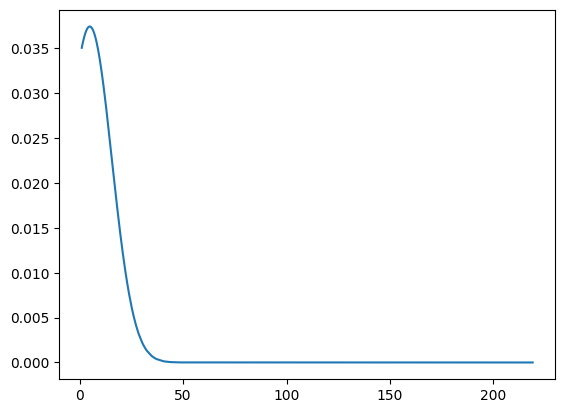

In [61]:
# skewness of networth
from scipy.stats import norm
plt.plot(df['networth'], norm.pdf(df['networth'], df['networth'].mean(), df['networth'].std()))

Here we see that networth attribute have positive skewness

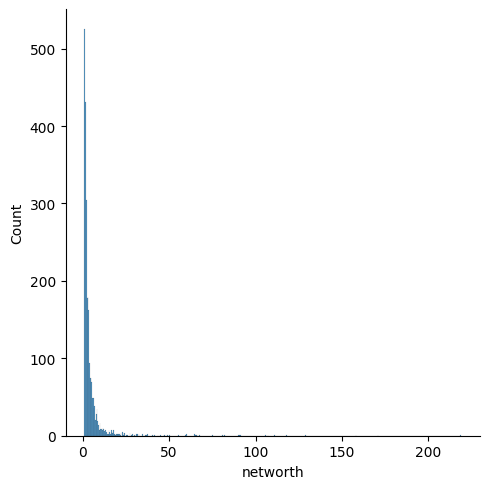

In [69]:
import seaborn as sns
sns.displot(df['networth'], x=df['networth'])

# done

## addition EDA using pandas profilling 

In [ ]:
import pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.9 MB 143 kB/s
     |████████████████████████████████| 596 kB 23.4 MB/s 
     |████████████████████████████████| 102 kB 47.5 MB/s 
     |████████████████████████████████| 690 kB 44.4 MB/s 
     |████████████████████████████████| 4.7 MB 53.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 43.7 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=de050eaaf4467f47e98a42dbf6c105ec4168b950a07d9ba133d791f919231c51
  Stored in directory: /tmp/pip-ephem-wheel-cache-l7juchmk/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=dddddc54c9066cf6bbebba53cd2666c7e82d5cddb3869eef9ec625156199c0a5
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba86876882394

In [ ]:
profile = ProfileReport(df, title = 'pandas profiling report')

OSError: ignored

In [ ]:
profile.to_widgets()